In [ ]:
from __future__ import absolute_import
from __future__ import division
from __future__ import print_function

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
import os
from scipy import ndimage

print(tf.__version__)

2.13.0


#Lab 11-0: CNN-Basics-keras-eager

(1, 3, 3, 1)


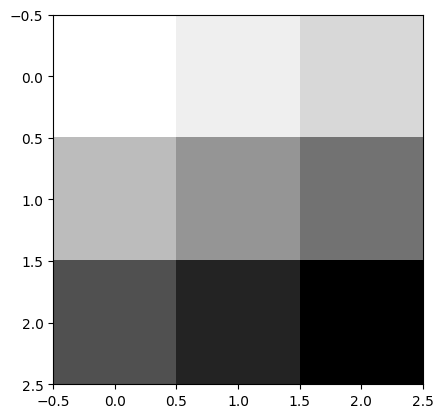

In [ ]:
image = tf.constant([[[[1],[2],[3]],
                   [[4],[5],[6]],
                   [[7],[8],[9]]]], dtype=np.float32)
print(image.shape) #(batch, height, width, channel )
plt.imshow(image.numpy().reshape(3,3), cmap='Greys')
plt.show()

image.shape (1, 3, 3, 1)
weight.shape (2, 2, 1, 1)
conv2d.shape (1, 2, 2, 1)
[[12. 16.]
 [24. 28.]]


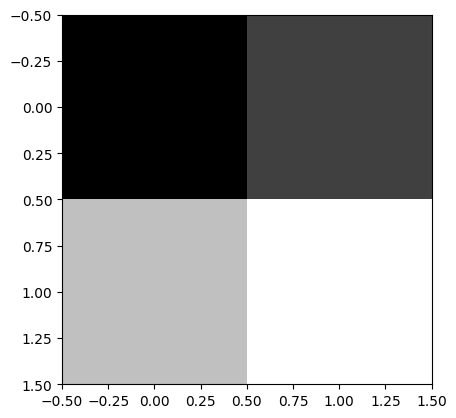

In [ ]:
print("image.shape", image.shape)
weight = np.array([[[[1.]],[[1.]]],
                   [[[1.]],[[1.]]]])
print("weight.shape", weight.shape)
weight_init = tf.constant_initializer(weight)
conv2d = keras.layers.Conv2D(filters=1, kernel_size=2, padding='VALID',
                             kernel_initializer=weight_init)(image)
print("conv2d.shape", conv2d.shape)
print(conv2d.numpy().reshape(2,2))
plt.imshow(conv2d.numpy().reshape(2,2), cmap='gray')
plt.show()

image.shape (1, 3, 3, 1)
weight.shape (2, 2, 1, 1)
conv2d.shape (1, 3, 3, 1)
[[12. 16.  9.]
 [24. 28. 15.]
 [15. 17.  9.]]


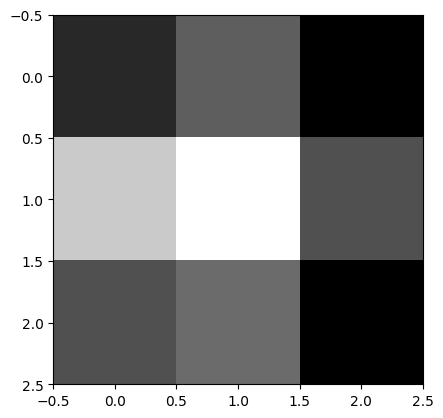

In [ ]:
print("image.shape", image.shape)
weight = np.array([[[[1.]],[[1.]]],
                   [[[1.]],[[1.]]]])
print("weight.shape", weight.shape)
weight_init = tf.constant_initializer(weight)
conv2d = keras.layers.Conv2D(filters=1, kernel_size=2, padding='SAME',
                             kernel_initializer=weight_init)(image)
print("conv2d.shape", conv2d.shape)
print(conv2d.numpy().reshape(3,3))
plt.imshow(conv2d.numpy().reshape(3,3), cmap='gray')
plt.show()

image.shape (1, 3, 3, 1)
weight.shape (2, 2, 1, 3)
conv2d.shape (1, 3, 3, 3)
[[12. 16.  9.]
 [24. 28. 15.]
 [15. 17.  9.]]
[[120. 160.  90.]
 [240. 280. 150.]
 [150. 170.  90.]]
[[-12. -16.  -9.]
 [-24. -28. -15.]
 [-15. -17.  -9.]]


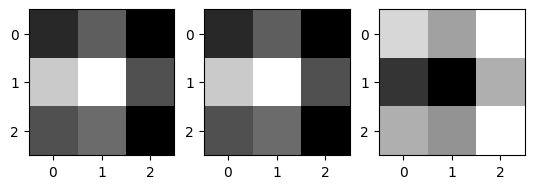

In [ ]:
# print("imag:\n", image)
print("image.shape", image.shape)

weight = np.array([[[[1.,10.,-1.]],[[1.,10.,-1.]]],
                   [[[1.,10.,-1.]],[[1.,10.,-1.]]]])
print("weight.shape", weight.shape)
weight_init = tf.constant_initializer(weight)
conv2d = keras.layers.Conv2D(filters=3, kernel_size=2, padding='SAME',
                             kernel_initializer=weight_init)(image)
print("conv2d.shape", conv2d.shape)
feature_maps = np.swapaxes(conv2d, 0, 3)
for i, feature_map in enumerate(feature_maps):
    print(feature_map.reshape(3,3))
    plt.subplot(1,3,i+1), plt.imshow(feature_map.reshape(3,3), cmap='gray')
plt.show()

In [ ]:
image = tf.constant([[[[4],[3]],
                    [[2],[1]]]], dtype=np.float32)
pool = keras.layers.MaxPool2D(pool_size=(2,2), strides=1, padding='VALID')(image)
print(pool.shape)
print(pool.numpy())

(1, 1, 1, 1)
[[[[4.]]]]


In [ ]:
image = tf.constant([[[[4],[3]],
                    [[2],[1]]]], dtype=np.float32)
pool = keras.layers.MaxPool2D(pool_size=(2,2), strides=1, padding='SAME')(image)
print(pool.shape)
print(pool.numpy())

(1, 2, 2, 1)
[[[[4.]
   [3.]]

  [[2.]
   [1.]]]]


In [ ]:
mnist = keras.datasets.mnist
class_names = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']

11490434/11490434 [==============================] - 0s 0us/step


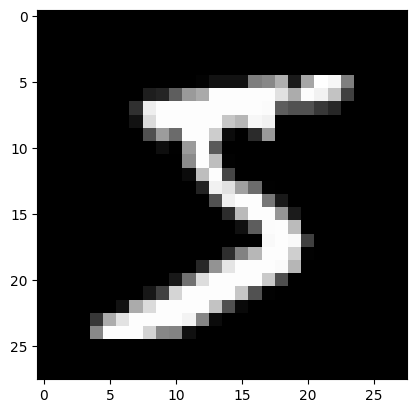

In [ ]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
train_images = train_images.astype(np.float32) / 255.
test_images = test_images.astype(np.float32) / 255.
img = train_images[0]
plt.imshow(img, cmap='gray')
plt.show()

(1, 14, 14, 5)


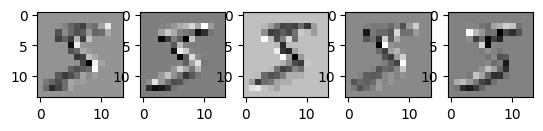

In [ ]:
img = img.reshape(-1,28,28,1)
img = tf.convert_to_tensor(img)
weight_init = keras.initializers.RandomNormal(stddev=0.01)
conv2d = keras.layers.Conv2D(filters=5, kernel_size=3, strides=(2, 2), padding='SAME',
                             kernel_initializer=weight_init)(img)
print(conv2d.shape)
feature_maps = np.swapaxes(conv2d, 0, 3)
for i, feature_map in enumerate(feature_maps):
    plt.subplot(1,5,i+1), plt.imshow(feature_map.reshape(14,14), cmap='gray')
plt.show()

(1, 7, 7, 5)


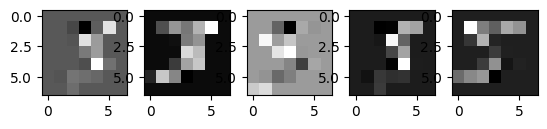

In [ ]:
pool = keras.layers.MaxPool2D(pool_size=(2, 2), strides=(2, 2), padding='SAME')(conv2d)
print(pool.shape)

feature_maps = np.swapaxes(pool, 0, 3)
for i, feature_map in enumerate(feature_maps):
    plt.subplot(1,5,i+1), plt.imshow(feature_map.reshape(7, 7), cmap='gray')
plt.show()

# Lab 11-1: MNIST-CNN-keras-sequential-eager

In [ ]:
# Hyperparmaeters
learning_rate = 0.001
training_epochs = 15
batch_size = 100

tf.random.set_seed(777)

In [ ]:
# Creating a Checkpoint Directory
cur_dir = os.getcwd()
ckpt_dir_name = 'checkpoints'
model_dir_name = 'minst_cnn_seq'

checkpoint_dir = os.path.join(cur_dir, ckpt_dir_name, model_dir_name)
os.makedirs(checkpoint_dir, exist_ok=True)

checkpoint_prefix = os.path.join(checkpoint_dir, model_dir_name)

In [ ]:
# MNIST/Fashion MNIST Data
mnist = keras.datasets.mnist
class_names = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']

In [ ]:
# Datasets
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

train_images = train_images.astype(np.float32) / 255.
test_images = test_images.astype(np.float32) / 255.
train_images = np.expand_dims(train_images, axis=-1)
test_images = np.expand_dims(test_images, axis=-1)

train_labels = to_categorical(train_labels, 10)
test_labels = to_categorical(test_labels, 10)

train_dataset = tf.data.Dataset.from_tensor_slices((train_images, train_labels)).shuffle(
                buffer_size=100000).batch(batch_size)
test_dataset = tf.data.Dataset.from_tensor_slices((test_images, test_labels)).batch(batch_size)

In [ ]:
# Model Function
def create_model():
    model = keras.Sequential()
    model.add(keras.layers.Conv2D(filters=32, kernel_size=3, activation=tf.nn.relu, padding='SAME',
                                  input_shape=(28, 28, 1)))
    model.add(keras.layers.MaxPool2D(padding='SAME'))
    model.add(keras.layers.Conv2D(filters=64, kernel_size=3, activation=tf.nn.relu, padding='SAME'))
    model.add(keras.layers.MaxPool2D(padding='SAME'))
    model.add(keras.layers.Conv2D(filters=128, kernel_size=3, activation=tf.nn.relu, padding='SAME'))
    model.add(keras.layers.MaxPool2D(padding='SAME'))
    model.add(keras.layers.Flatten())
    model.add(keras.layers.Dense(256, activation=tf.nn.relu))
    model.add(keras.layers.Dropout(0.4))
    model.add(keras.layers.Dense(10))
    return model

In [ ]:
model = create_model()
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 14, 14, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 14, 14, 64)        18496     
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 7, 7, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_6 (Conv2D)           (None, 7, 7, 128)         73856     
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 4, 4, 128)         0

In [ ]:
# Loss Function
@tf.function
def loss_fn(model, images, labels):
    logits = model(images, training=True)
    loss = tf.reduce_mean(tf.keras.losses.categorical_crossentropy(
        y_pred=logits, y_true=labels, from_logits=True))
    return loss

In [ ]:
# Calculating Gradient
@tf.function
def grad(model, images, labels):
    with tf.GradientTape() as tape:
        loss = loss_fn(model, images, labels)
    return tape.gradient(loss, model.variables)

In [ ]:
# Caculating Model's Accuracy
@tf.function
def evaluate(model, images, labels):
    logits = model(images, training=False)
    correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(labels, 1))
    accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
    return accuracy

In [ ]:
# Optimizer
optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)

In [ ]:
# Creating a Checkpoint
checkpoint = tf.train.Checkpoint(cnn=model)

In [ ]:
# Training
@tf.function
def train(model, images, labels):
    grads = grad(model, images, labels)
    optimizer.apply_gradients(zip(grads, model.trainable_variables))

print('Learning started. It takes sometime.')
for epoch in range(training_epochs):
    avg_loss = 0.
    avg_train_acc = 0.
    avg_test_acc = 0.
    train_step = 0
    test_step = 0

    for images, labels in train_dataset:
        train(model, images, labels)
        #grads = grad(model, images, labels)
        #optimizer.apply_gradients(zip(grads, model.variables))
        loss = loss_fn(model, images, labels)
        acc = evaluate(model, images, labels)
        avg_loss = avg_loss + loss
        avg_train_acc = avg_train_acc + acc
        train_step += 1
    avg_loss = avg_loss / train_step
    avg_train_acc = avg_train_acc / train_step

    for images, labels in test_dataset:
        acc = evaluate(model, images, labels)
        avg_test_acc = avg_test_acc + acc
        test_step += 1
    avg_test_acc = avg_test_acc / test_step

    print('Epoch:', '{}'.format(epoch + 1), 'loss =', '{:.8f}'.format(avg_loss),
          'train accuracy = ', '{:.4f}'.format(avg_train_acc),
          'test accuracy = ', '{:.4f}'.format(avg_test_acc))

    checkpoint.save(file_prefix=checkpoint_prefix)

print('Learning Finished!')

Learning started. It takes sometime.
Epoch: 1 loss = 0.16619340 train accuracy =  0.9592 test accuracy =  0.9829
Epoch: 2 loss = 0.04094808 train accuracy =  0.9899 test accuracy =  0.9897
Epoch: 3 loss = 0.02694280 train accuracy =  0.9933 test accuracy =  0.9927
Epoch: 4 loss = 0.01928377 train accuracy =  0.9956 test accuracy =  0.9900
Epoch: 5 loss = 0.01480178 train accuracy =  0.9965 test accuracy =  0.9918
Epoch: 6 loss = 0.01031129 train accuracy =  0.9974 test accuracy =  0.9925
Epoch: 7 loss = 0.00896839 train accuracy =  0.9978 test accuracy =  0.9924
Epoch: 8 loss = 0.00796876 train accuracy =  0.9983 test accuracy =  0.9926
Epoch: 9 loss = 0.00706839 train accuracy =  0.9985 test accuracy =  0.9910
Epoch: 10 loss = 0.00534509 train accuracy =  0.9987 test accuracy =  0.9935
Epoch: 11 loss = 0.00439282 train accuracy =  0.9991 test accuracy =  0.9924
Epoch: 12 loss = 0.00398253 train accuracy =  0.9991 test accuracy =  0.9921
Epoch: 13 loss = 0.00326015 train accuracy =  0.

# Lab 11-2: MNIST-CNN-keras-functional-eager

In [ ]:
# Hyperparameters
learning_rate = 0.001
training_epochs = 15
batch_size = 100

tf.random.set_seed(777)

In [ ]:
# Creating a Checkpoint Directory
cur_dir = os.getcwd()
ckpt_dir_name = 'checkpoints'
model_dir_name = 'minst_cnn_func'

checkpoint_dir = os.path.join(cur_dir, ckpt_dir_name, model_dir_name)
os.makedirs(checkpoint_dir, exist_ok=True)

checkpoint_prefix = os.path.join(checkpoint_dir, model_dir_name)

In [ ]:
# MNIST/Fashion MNIST Data
mnist = keras.datasets.mnist
class_names = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']

In [ ]:
# Datasets
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

train_images = train_images.astype(np.float32) / 255.
test_images = test_images.astype(np.float32) / 255.
train_images = np.expand_dims(train_images, axis=-1)
test_images = np.expand_dims(test_images, axis=-1)

train_labels = to_categorical(train_labels, 10)
test_labels = to_categorical(test_labels, 10)

train_dataset = tf.data.Dataset.from_tensor_slices((train_images, train_labels)).shuffle(
                buffer_size=100000).batch(batch_size)
test_dataset = tf.data.Dataset.from_tensor_slices((test_images, test_labels)).batch(batch_size)

11490434/11490434 [==============================] - 0s 0us/step


In [ ]:
# Model Function
def create_model():
    inputs = keras.Input(shape=(28, 28, 1))
    conv1 = keras.layers.Conv2D(filters=32, kernel_size=[3, 3], padding='SAME', activation=tf.nn.relu)(inputs)
    pool1 = keras.layers.MaxPool2D(padding='SAME')(conv1)
    conv2 = keras.layers.Conv2D(filters=64, kernel_size=[3, 3], padding='SAME', activation=tf.nn.relu)(pool1)
    pool2 = keras.layers.MaxPool2D(padding='SAME')(conv2)
    conv3 = keras.layers.Conv2D(filters=128, kernel_size=[3, 3], padding='SAME', activation=tf.nn.relu)(pool2)
    pool3 = keras.layers.MaxPool2D(padding='SAME')(conv3)
    pool3_flat = keras.layers.Flatten()(pool3)
    dense4 = keras.layers.Dense(units=256, activation=tf.nn.relu)(pool3_flat)
    drop4 = keras.layers.Dropout(rate=0.4)(dense4)
    logits = keras.layers.Dense(units=10)(drop4)
    return keras.Model(inputs=inputs, outputs=logits)

In [ ]:
model = create_model()
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 14, 14, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 7, 7, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 7, 7, 128)         73856 

In [ ]:
# Loss Function
@tf.function
def loss_fn(model, images, labels):
    logits = model(images, training=True)
    loss = tf.reduce_mean(tf.keras.losses.categorical_crossentropy(
        y_pred=logits, y_true=labels, from_logits=True))
    return loss

In [ ]:
# Calculate Gradient
@tf.function
def grad(model, images, labels):
    with tf.GradientTape() as tape:
        loss = loss_fn(model, images, labels)
    return tape.gradient(loss, model.variables)

In [ ]:
# Caculating Model's Accuracy
@tf.function
def evaluate(model, images, labels):
    logits = model(images, training=False)
    correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(labels, 1))
    accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
    return accuracy

In [ ]:
# Optimizer
optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)

In [ ]:
# Creating a Checkpoint
checkpoint = tf.train.Checkpoint(cnn=model)

In [ ]:
# Training
@tf.function
def train(model, images, labels):
    grads = grad(model, images, labels)
    optimizer.apply_gradients(zip(grads, model.trainable_variables))

print('Learning started. It takes sometime.')
for epoch in range(training_epochs):
    avg_loss = 0.
    avg_train_acc = 0.
    avg_test_acc = 0.
    train_step = 0
    test_step = 0

    for images, labels in train_dataset:
        train(model, images, labels)
        #grads = grad(model, images, labels)
        #optimizer.apply_gradients(zip(grads, model.variables))
        loss = loss_fn(model, images, labels)
        acc = evaluate(model, images, labels)
        avg_loss = avg_loss + loss
        avg_train_acc = avg_train_acc + acc
        train_step += 1
    avg_loss = avg_loss / train_step
    avg_train_acc = avg_train_acc / train_step

    for images, labels in test_dataset:
        acc = evaluate(model, images, labels)
        avg_test_acc = avg_test_acc + acc
        test_step += 1
    avg_test_acc = avg_test_acc / test_step

    print('Epoch:', '{}'.format(epoch + 1), 'loss =', '{:.8f}'.format(avg_loss),
          'train accuracy = ', '{:.4f}'.format(avg_train_acc),
          'test accuracy = ', '{:.4f}'.format(avg_test_acc))

    checkpoint.save(file_prefix=checkpoint_prefix)

print('Learning Finished!')

Learning started. It takes sometime.
Epoch: 1 loss = 0.16774517 train accuracy =  0.9582 test accuracy =  0.9878
Epoch: 2 loss = 0.04046650 train accuracy =  0.9899 test accuracy =  0.9898
Epoch: 3 loss = 0.02731636 train accuracy =  0.9930 test accuracy =  0.9911
Epoch: 4 loss = 0.01964764 train accuracy =  0.9951 test accuracy =  0.9902
Epoch: 5 loss = 0.01536684 train accuracy =  0.9966 test accuracy =  0.9907
Epoch: 6 loss = 0.01137395 train accuracy =  0.9975 test accuracy =  0.9922
Epoch: 7 loss = 0.00955869 train accuracy =  0.9979 test accuracy =  0.9931
Epoch: 8 loss = 0.00767284 train accuracy =  0.9982 test accuracy =  0.9936
Epoch: 9 loss = 0.00679871 train accuracy =  0.9987 test accuracy =  0.9913
Epoch: 10 loss = 0.00582141 train accuracy =  0.9986 test accuracy =  0.9937
Epoch: 11 loss = 0.00393263 train accuracy =  0.9992 test accuracy =  0.9930
Epoch: 12 loss = 0.00418553 train accuracy =  0.9992 test accuracy =  0.9939
Epoch: 13 loss = 0.00328864 train accuracy =  0.

# Lab 11-3: MNIST-CNN-keras-subclassing-eager

In [ ]:
# Hyperparameters
learning_rate = 0.001
training_epochs = 15
batch_size = 100

tf.random.set_seed(777)

In [ ]:
# Creating a Checkpoint Directory
cur_dir = os.getcwd()
ckpt_dir_name = 'checkpoints'
model_dir_name = 'minst_cnn_subclass'

checkpoint_dir = os.path.join(cur_dir, ckpt_dir_name, model_dir_name)
os.makedirs(checkpoint_dir, exist_ok=True)

checkpoint_prefix = os.path.join(checkpoint_dir, model_dir_name)

In [ ]:
# MNIST/Fashion MNIST Data
mnist = keras.datasets.mnist
class_names = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']

In [ ]:
# Datasets
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

train_images = train_images.astype(np.float32) / 255.
test_images = test_images.astype(np.float32) / 255.
train_images = np.expand_dims(train_images, axis=-1)
test_images = np.expand_dims(test_images, axis=-1)

train_labels = to_categorical(train_labels, 10)
test_labels = to_categorical(test_labels, 10)

train_dataset = tf.data.Dataset.from_tensor_slices((train_images, train_labels)).shuffle(
                buffer_size=100000).batch(batch_size)
test_dataset = tf.data.Dataset.from_tensor_slices((test_images, test_labels)).batch(batch_size)

11490434/11490434 [==============================] - 0s 0us/step


In [ ]:
# Model Class
class MNISTModel(tf.keras.Model):
    def __init__(self):
        super(MNISTModel, self).__init__()
        self.conv1 = keras.layers.Conv2D(filters=32, kernel_size=[3, 3], padding='SAME', activation=tf.nn.relu)
        self.pool1 = keras.layers.MaxPool2D(padding='SAME')
        self.conv2 = keras.layers.Conv2D(filters=64, kernel_size=[3, 3], padding='SAME', activation=tf.nn.relu)
        self.pool2 = keras.layers.MaxPool2D(padding='SAME')
        self.conv3 = keras.layers.Conv2D(filters=128, kernel_size=[3, 3], padding='SAME', activation=tf.nn.relu)
        self.pool3 = keras.layers.MaxPool2D(padding='SAME')
        self.pool3_flat = keras.layers.Flatten()
        self.dense4 = keras.layers.Dense(units=256, activation=tf.nn.relu)
        self.drop4 = keras.layers.Dropout(rate=0.4)
        self.dense5 = keras.layers.Dense(units=10)
    def call(self, inputs, training=False):
        net = self.conv1(inputs)
        net = self.pool1(net)
        net = self.conv2(net)
        net = self.pool2(net)
        net = self.conv3(net)
        net = self.pool3(net)
        net = self.pool3_flat(net)
        net = self.dense4(net)
        net = self.drop4(net)
        net = self.dense5(net)
        return net

In [ ]:
model = MNISTModel()
temp_inputs = keras.Input(shape=(28, 28, 1))
model(temp_inputs)
model.summary()

Model: "mnist_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             multiple                  320       
                                                                 
 max_pooling2d (MaxPooling2  multiple                  0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           multiple                  18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  multiple                  0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           multiple                  73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  multiple                  

In [ ]:
# Loss Function
@tf.function
def loss_fn(model, images, labels):
    logits = model(images, training=True)
    loss = tf.reduce_mean(tf.keras.losses.categorical_crossentropy(
        y_pred=logits, y_true=labels, from_logits=True))
    return loss

In [ ]:
# Calculating Gradient
@tf.function
def grad(model, images, labels):
    with tf.GradientTape() as tape:
        loss = loss_fn(model, images, labels)
    return tape.gradient(loss, model.variables)

In [ ]:
# Caculating Model's Accuracy
@tf.function
def evaluate(model, images, labels):
    logits = model(images, training=False)
    correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(labels, 1))
    accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
    return accuracy

In [ ]:
# Optimizer
optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)

In [ ]:
# Creating a Checkpoint
checkpoint = tf.train.Checkpoint(cnn=model)

In [ ]:
# Training
@tf.function
def train(model, images, labels):
    grads = grad(model, images, labels)
    optimizer.apply_gradients(zip(grads, model.trainable_variables))

print('Learning started. It takes sometime.')
for epoch in range(training_epochs):
    avg_loss = 0.
    avg_train_acc = 0.
    avg_test_acc = 0.
    train_step = 0
    test_step = 0

    for images, labels in train_dataset:
        train(model, images, labels)
        loss = loss_fn(model, images, labels)
        acc = evaluate(model, images, labels)
        avg_loss = avg_loss + loss
        avg_train_acc = avg_train_acc + acc
        train_step += 1
    avg_loss = avg_loss / train_step
    avg_train_acc = avg_train_acc / train_step

    for images, labels in test_dataset:
        acc = evaluate(model, images, labels)
        avg_test_acc = avg_test_acc + acc
        test_step += 1
    avg_test_acc = avg_test_acc / test_step

    print('Epoch:', '{}'.format(epoch + 1), 'loss =', '{:.8f}'.format(avg_loss),
          'train accuracy = ', '{:.4f}'.format(avg_train_acc),
          'test accuracy = ', '{:.4f}'.format(avg_test_acc))

    checkpoint.save(file_prefix=checkpoint_prefix)

print('Learning Finished!')

Learning started. It takes sometime.
Epoch: 1 loss = 0.16422907 train accuracy =  0.9579 test accuracy =  0.9856
Epoch: 2 loss = 0.03709916 train accuracy =  0.9905 test accuracy =  0.9912
Epoch: 3 loss = 0.02709698 train accuracy =  0.9935 test accuracy =  0.9922
Epoch: 4 loss = 0.01864725 train accuracy =  0.9951 test accuracy =  0.9912
Epoch: 5 loss = 0.01504333 train accuracy =  0.9968 test accuracy =  0.9920
Epoch: 6 loss = 0.01106141 train accuracy =  0.9972 test accuracy =  0.9930
Epoch: 7 loss = 0.00899797 train accuracy =  0.9978 test accuracy =  0.9938
Epoch: 8 loss = 0.00712003 train accuracy =  0.9983 test accuracy =  0.9920
Epoch: 9 loss = 0.00608510 train accuracy =  0.9989 test accuracy =  0.9910
Epoch: 10 loss = 0.00510816 train accuracy =  0.9988 test accuracy =  0.9933
Epoch: 11 loss = 0.00387203 train accuracy =  0.9991 test accuracy =  0.9932
Epoch: 12 loss = 0.00333487 train accuracy =  0.9994 test accuracy =  0.9935
Epoch: 13 loss = 0.00302758 train accuracy =  0.

# Lab 11-4: MNIST-CNN-keras-ensemble-keras-eager

In [ ]:
# Hyper Parameters
learning_rate = 0.001
training_epochs = 15
batch_size = 100

tf.random.set_seed(777)

In [ ]:
# Creating Checkpoint Directory
cur_dir = os.getcwd()
ckpt_dir_name = 'checkpoints'
model_dir_name = 'minst_cnn_emsemble'

checkpoint_dir = os.path.join(cur_dir, ckpt_dir_name, model_dir_name)
os.makedirs(checkpoint_dir, exist_ok=True)

checkpoint_prefix = os.path.join(checkpoint_dir, model_dir_name)

In [ ]:
# MNIST/Fashion MNIST Data
mnist = keras.datasets.mnist
class_names = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']

In [ ]:
# Datasets
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

train_images = train_images.astype(np.float32) / 255.
test_images = test_images.astype(np.float32) / 255.
train_images = np.expand_dims(train_images, axis=-1)
test_images = np.expand_dims(test_images, axis=-1)

train_labels = to_categorical(train_labels, 10)
test_labels = to_categorical(test_labels, 10)

train_dataset = tf.data.Dataset.from_tensor_slices((train_images, train_labels)).shuffle(
                buffer_size=100000).batch(batch_size)
test_dataset = tf.data.Dataset.from_tensor_slices((test_images, test_labels)).batch(batch_size)

In [ ]:
# Model Class
class MNISTModel(tf.keras.Model):
    def __init__(self):
        super(MNISTModel, self).__init__()
        self.conv1 = keras.layers.Conv2D(filters=32, kernel_size=[3, 3], padding='SAME', activation=tf.nn.relu)
        self.pool1 = keras.layers.MaxPool2D(padding='SAME')
        self.conv2 = keras.layers.Conv2D(filters=64, kernel_size=[3, 3], padding='SAME', activation=tf.nn.relu)
        self.pool2 = keras.layers.MaxPool2D(padding='SAME')
        self.conv3 = keras.layers.Conv2D(filters=128, kernel_size=[3, 3], padding='SAME', activation=tf.nn.relu)
        self.pool3 = keras.layers.MaxPool2D(padding='SAME')
        self.pool3_flat = keras.layers.Flatten()
        self.dense4 = keras.layers.Dense(units=256, activation=tf.nn.relu)
        self.drop4 = keras.layers.Dropout(rate=0.4)
        self.dense5 = keras.layers.Dense(units=10)
    def call(self, inputs, training=False):
        net = self.conv1(inputs)
        net = self.pool1(net)
        net = self.conv2(net)
        net = self.pool2(net)
        net = self.conv3(net)
        net = self.pool3(net)
        net = self.pool3_flat(net)
        net = self.dense4(net)
        net = self.drop4(net)
        net = self.dense5(net)
        return net

In [ ]:
models = []
num_models = 3
for m in range(num_models):
    models.append(MNISTModel())

In [ ]:
# Loss Function
def loss_fn(model, images, labels):
    logits = model(images, training=True)
    loss = tf.reduce_mean(tf.keras.losses.categorical_crossentropy(
        y_pred=logits, y_true=labels, from_logits=True))
    return loss

In [ ]:
# Calculating Gradient
def grad(model, images, labels):
    with tf.GradientTape() as tape:
        loss = loss_fn(model, images, labels)
    return tape.gradient(loss, model.variables)

In [ ]:
# Caculating Model's Accuracy
def evaluate(models, images, labels):
    predictions = np.zeros_like(labels)
    for model in models:
        logits = model(images, training=False)
        predictions += logits
    correct_prediction = tf.equal(tf.argmax(predictions, 1), tf.argmax(labels, 1))
    accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
    return accuracy

In [ ]:
# Optimizer
optimizer = tf.keras.optimizers.legcay.Adam(learning_rate=learning_rate)

In [ ]:
# Creating Checkpoints
checkpoints = []
for m in range(num_models):
    checkpoints.append(tf.train.Checkpoint(cnn=models[m]))

In [ ]:
# Training
print('Learning started. It takes sometime.')
for epoch in range(training_epochs):
    avg_loss = 0.
    avg_train_acc = 0.
    avg_test_acc = 0.
    train_step = 0
    test_step = 0

    for images, labels in train_dataset:
        for model in models:
            grads = grad(model, images, labels)
            optimizer.apply_gradients(zip(grads, model.variables))
            loss = loss_fn(model, images, labels)
            avg_loss += loss / num_models
        acc = evaluate(models, images, labels)
        avg_train_acc += acc
        train_step += 1
    avg_loss = avg_loss / train_step
    avg_train_acc = avg_train_acc / train_step

    for images, labels in test_dataset:
        acc = evaluate(models, images, labels)
        avg_test_acc += acc
        test_step += 1
    avg_test_acc = avg_test_acc / test_step

    print('Epoch:', '{}'.format(epoch + 1), 'loss =', '{:.8f}'.format(avg_loss),
          'train accuracy = ', '{:.4f}'.format(avg_train_acc),
          'test accuracy = ', '{:.4f}'.format(avg_test_acc))


    for idx, checkpoint in enumerate(checkpoints):
        checkpoint.save(file_prefix=checkpoint_prefix+'-{}'.format(idx))

print('Learning Finished!')

# Lab 11-5: MNIST-CNN-best-keras-eager

In [ ]:
# Hyper Parameters
learning_rate = 0.001
training_epochs = 15
batch_size = 100

tf.random.set_seed(777)

In [ ]:
# Creating a Checkpoint Directory
cur_dir = os.getcwd()
ckpt_dir_name = 'checkpoints'
model_dir_name = 'minst_cnn_best'

checkpoint_dir = os.path.join(cur_dir, ckpt_dir_name, model_dir_name)
os.makedirs(checkpoint_dir, exist_ok=True)

checkpoint_prefix = os.path.join(checkpoint_dir, model_dir_name)

In [ ]:
# MNIST/Fashion MNIST Data
mnist = keras.datasets.mnist
class_names = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']

In [ ]:
# Data Augmentation
def data_augmentation(images, labels):
    aug_images = []
    aug_labels = []

    for x, y in zip(images, labels):
        aug_images.append(x)
        aug_labels.append(y)

        bg_value = np.median(x)

        for _ in range(4):
            angle = np.random.randint(-15, 15, 1)
            rot_img = ndimage.rotate(x, angle[0], reshape=False, cval=bg_value)

            shift = np.random.randint(-2, 2, 2)
            shift_img = ndimage.shift(rot_img, shift, cval=bg_value)

            aug_images.append(shift_img)
            aug_labels.append(y)
    aug_images = np.array(aug_images)
    aug_labels = np.array(aug_labels)
    return aug_images, aug_labels

In [ ]:
# Datasets
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

train_images, train_labels = data_augmentation(train_images, train_labels)

train_images = train_images.astype(np.float32) / 255.
test_images = test_images.astype(np.float32) / 255.
train_images = np.expand_dims(train_images, axis=-1)
test_images = np.expand_dims(test_images, axis=-1)

train_labels = to_categorical(train_labels, 10)
test_labels = to_categorical(test_labels, 10)

train_dataset = tf.data.Dataset.from_tensor_slices((train_images, train_labels)).shuffle(
                buffer_size=500000).batch(batch_size)
test_dataset = tf.data.Dataset.from_tensor_slices((test_images, test_labels)).batch(batch_size)

In [ ]:
# Model Class
class ConvBNRelu(tf.keras.Model):
    def __init__(self, filters, kernel_size=3, strides=1, padding='SAME'):
        super(ConvBNRelu, self).__init__()
        self.conv = keras.layers.Conv2D(filters=filters, kernel_size=kernel_size, strides=strides,
                                        padding=padding, kernel_initializer='glorot_normal')
        self.batchnorm = tf.keras.layers.BatchNormalization()
    def call(self, inputs, training=False):
        layer = self.conv(inputs)
        layer = self.batchnorm(layer)
        layer = tf.nn.relu(layer)
        return layer
class DenseBNRelu(tf.keras.Model):
    def __init__(self, units):
        super(DenseBNRelu, self).__init__()
        self.dense = keras.layers.Dense(units=units, kernel_initializer='glorot_normal')
        self.batchnorm = tf.keras.layers.BatchNormalization()
    def call(self, inputs, training=False):
        layer = self.dense(inputs)
        layer = self.batchnorm(layer)
        layer = tf.nn.relu(layer)
        return layer
class MNISTModel(tf.keras.Model):
    def __init__(self):
        super(MNISTModel, self).__init__()
        self.conv1 = ConvBNRelu(filters=32, kernel_size=[3, 3], padding='SAME')
        self.pool1 = keras.layers.MaxPool2D(padding='SAME')
        self.conv2 = ConvBNRelu(filters=64, kernel_size=[3, 3], padding='SAME')
        self.pool2 = keras.layers.MaxPool2D(padding='SAME')
        self.conv3 = ConvBNRelu(filters=128, kernel_size=[3, 3], padding='SAME')
        self.pool3 = keras.layers.MaxPool2D(padding='SAME')
        self.pool3_flat = keras.layers.Flatten()
        self.dense4 = DenseBNRelu(units=256)
        self.drop4 = keras.layers.Dropout(rate=0.4)
        self.dense5 = keras.layers.Dense(units=10, kernel_initializer='glorot_normal')
    def call(self, inputs, training=False):
        net = self.conv1(inputs)
        net = self.pool1(net)
        net = self.conv2(net)
        net = self.pool2(net)
        net = self.conv3(net)
        net = self.pool3(net)
        net = self.pool3_flat(net)
        net = self.dense4(net)
        net = self.drop4(net)
        net = self.dense5(net)
        return net

In [ ]:
models = []
num_models = 5
for m in range(num_models):
    models.append(MNISTModel())

In [ ]:
# Loss Function
def loss_fn(model, images, labels):
    logits = model(images, training=True)
    loss = tf.reduce_mean(tf.keras.losses.categorical_crossentropy(
        y_pred=logits, y_true=labels, from_logits=True))
    return loss

In [ ]:
# Calculating Gradient
def grad(model, images, labels):
    with tf.GradientTape() as tape:
        loss = loss_fn(model, images, labels)
    return tape.gradient(loss, model.trainable_variables)

In [ ]:
# Caculating Model's Accuracy
def evaluate(models, images, labels):
    predictions = np.zeros_like(labels)
    for model in models:
        logits = model(images, training=False)
        predictions += logits
    correct_prediction = tf.equal(tf.argmax(predictions, 1), tf.argmax(labels, 1))
    accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
    return accuracy

In [ ]:
# Optimizer
lr_decay = tf.keras.optimizers.schedules.ExponentialDecay(learning_rate,
                                                          train_images.shape[0]/batch_size*num_models*5,
                                                          0.5, staircase=True)
optimizer = tf.keras.optimizers.legacy.Adam(learning_rate=lr_decay)

In [ ]:
# Creating Checkpoints
checkpoints = []
for m in range(num_models):
    checkpoints.append(tf.train.Checkpoint(cnn=models[m]))

In [ ]:
# Train
print('Learning started. It takes sometime.')
for epoch in range(training_epochs):
    avg_loss = 0.
    avg_train_acc = 0.
    avg_test_acc = 0.
    train_step = 0
    test_step = 0
    for images, labels in train_dataset:
        for model in models:
            grads = grad(model, images, labels)
            optimizer.apply_gradients(zip(grads, model.trainable_variables))
            loss = loss_fn(model, images, labels)
            avg_loss += loss / num_models
        acc = evaluate(models, images, labels)
        avg_train_acc += acc
        train_step += 1
    avg_loss = avg_loss / train_step
    avg_train_acc = avg_train_acc / train_step

    for images, labels in test_dataset:
        acc = evaluate(models, images, labels)
        avg_test_acc += acc
        test_step += 1
    avg_test_acc = avg_test_acc / test_step

    print('Epoch:', '{}'.format(epoch + 1), 'loss =', '{:.8f}'.format(avg_loss),
          'train accuracy = ', '{:.4f}'.format(avg_train_acc),
          'test accuracy = ', '{:.4f}'.format(avg_test_acc))


    for idx, checkpoint in enumerate(checkpoints):
        checkpoint.save(file_prefix=checkpoint_prefix+'-{}'.format(idx))

print('Learning Finished!')

Learning started. It takes sometime.
